In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Triangle 

Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.

In [4]:
def minimumTotal(triangle):
        n = len(triangle) #number of choices
        if n == 1: 
            return triangle[0][0]
        else:
            for row in range(len(triangle) - 2, -1, -1):
                for col in range(len(triangle[row])):
                    triangle[row][col] += min(triangle[row+1][col], triangle[row+1][col+1])
            return triangle[0][0]

In [5]:
triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
minimumTotal(triangle)

11

# Minimum Number of Arrows to Burst Balloons 

There are some spherical balloons taped onto a flat wall that represents the XY-plane. The balloons are represented as a 2D integer array points where points[i] = [xstart, xend] denotes a balloon whose horizontal diameter stretches between xstart and xend. You do not know the exact y-coordinates of the balloons.

Arrows can be shot up directly vertically (in the positive y-direction) from different points along the x-axis. A balloon with xstart and xend is burst by an arrow shot at x if xstart <= x <= xend. There is no limit to the number of arrows that can be shot. A shot arrow keeps traveling up infinitely, bursting any balloons in its path.

Given the array points, return the minimum number of arrows that must be shot to burst all balloons.

In [82]:
def findMinArrowShots(points):
        min_value = min(point[0] for point in points)
        max_value = max(point[1] for point in points)
        killed = [1] * len(points)
        indice_x = [0] * (max_value + 1 - min_value)
        for indice, x in enumerate(range(min_value, max_value + 1)):
            nb_killed = 0 
            liste_points_killed = []
            for i, point in enumerate(points):
                if x in range(point[0], point[1] + 1):
                    nb_killed += 1
                    liste_points_killed.append([point[0], point[1]])
            indice_x[indice] = [nb_killed, liste_points_killed]
        liste = [[i, nb_killed[0], nb_killed[1]] for i, nb_killed in enumerate(indice_x)]
        liste_sorted = sorted(liste, key=lambda x: x[1])[::-1]
        Arrows = [liste_sorted[0][0] + min_value]
        killed_points = [element for element in liste_sorted[0][2]]
        indice_killed_points = [points.index(killed_point) for killed_point in killed_points]
        for i in indice_killed_points:
             killed[i] = 0
        liste_sorted = [
                        element for element in liste_sorted 
                            if all(sub_element not in killed_points for sub_element in element[2])
                        ]
        while killed != [0] * len(points):
            Arrows.append(liste_sorted[0][0] + min_value)
            killed_points = [element for element in liste_sorted[0][2]]
            indice_killed_points = [points.index(killed_point) for killed_point in killed_points]
            for i in indice_killed_points:
                killed[i] = 0
                liste_sorted = [
                        element for element in liste_sorted 
                            if all(sub_element not in killed_points for sub_element in element[2])
                        ]
        return len(Arrows)

In [83]:
findMinArrowShots(points)

2

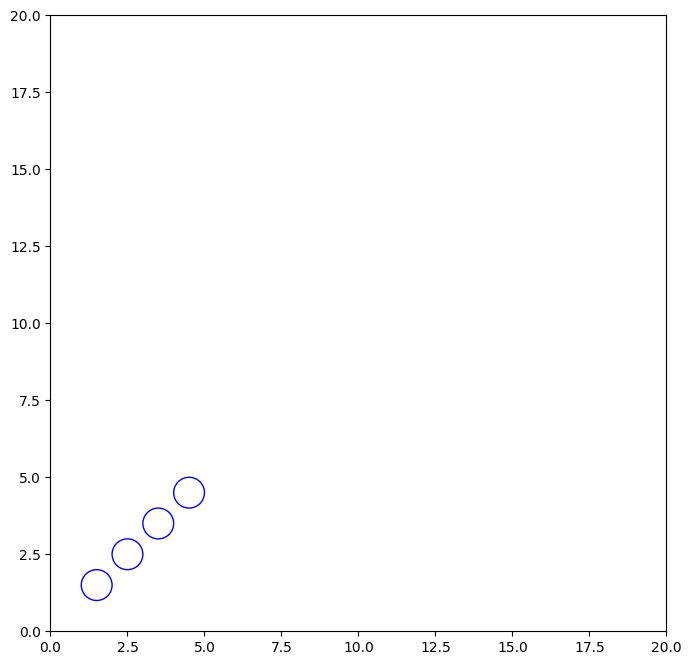

In [75]:
points = [[1,2],[2,3],[3,4],[4,5]]

plt.figure(figsize=(12, 8))
ax = plt.gca()  # Obtenir l'axe courant

for point in points:
    center_x = point[0] + (point[1] - point[0]) / 2
    radius = (point[1] - point[0]) / 2
    circle = plt.Circle((center_x, center_x), radius, facecolor='none', edgecolor='b')
    ax.add_patch(circle)  # Ajouter le cercle à l'axe

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_aspect('equal')  # Pour s'assurer que le cercle est rond

plt.show()

# Word Search

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

In [35]:
import copy
def create_mapped_board(board):
    mapped_board = copy.deepcopy(board)
    init = -4
    n_rows = len(board)
    n_cols = len(board[0] if n_rows > 0 else 0) 
    for i, row in enumerate(board): 
        init += 4
        for j, col in enumerate(row):
            mapped_board[i][j] = [i,j, init + j + 1]
    return mapped_board

def retourner_mots(board):
    """ 
    Exemple de board : 
    [[1,2,3,4], 
    [5,6,7,8],
    ...]]
    On sait dès lors que pour passer d'une lettre à l'autre on fait +-1 ou +-4
    end = x,y coordonnées du point d'arrivée
    Et on parcourt de manière récursive les différentes combinaisons
    """
    def previous(points_parcourus, point):
        """ 
        En partant d'un point, donne les possibilités du point d'avant si pas déjà parcouru.
        """
        liste_previous = []
        for possible in [-4, -1, 1, 4]:
            if ((point + possible) in range(len(points_parcourus))) and (points_parcourus[point + possible - 1]!=0):
                liste_previous.append(point + possible)
        return [previous(element) for element in liste_previous]
    
    mapped_board = create_mapped_board(board)
    mapped_board_flatten = [item for sublist in mapped_board for item in sublist]
    liste_mots = []
    for i, element in enumerate(mapped_board_flatten):
        list_of_end = [element[2] for element in mapped_board_flatten]
        x,y = element[0], element[1]
        list_of_end[i] = 0  #on ne reviendra pas 
        chemin = [element]
        while previous



    return liste_mots 

def exist(board):
    # Initialisation 
    n_rows = len(board)
    n_cols = len(board[0] if n_rows > 0 else 0) 
    mapped_board = create_mapped_board(board)

    # Liste des mots que l'on peut créer
    liste_mots = []

    # Différents points de départ que l'on peut prendre
    start_point = [i for i in range(n_rows * n_cols)] #Mettre à 0 lorsque parcouru

    for i, depart in enumerate(start_point):
        start_point[i] = 0  #Départ ok

        # Parcourir les mots que l'on peut créer depuis ce point
        x, y, score = mapped_board[i][0], mapped_board[i][1], mapped_board[i][2] 
        
    return None

In [43]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"
mapped_board = create_mapped_board(board)
mapped_board

[[[0, 0, 1], [0, 1, 2], [0, 2, 3], [0, 3, 4]],
 [[1, 0, 5], [1, 1, 6], [1, 2, 7], [1, 3, 8]],
 [[2, 0, 9], [2, 1, 10], [2, 2, 11], [2, 3, 12]]]

In [67]:
len(4)

TypeError: object of type 'int' has no len()

In [70]:
mapped_board_flatten = [item for sublist in mapped_board for item in sublist]
list_of_end = [element[2] for element in mapped_board_flatten]
def previous(point):
    """ 
    En partant d'un point, donne les possibilités du point d'avant si pas déjà parcouru.
    """
    visited = [1] * len(list_of_end)
    visited[point - 1] = 0
    
    def give_previous(liste_x):
        chemins = []
        for sub_liste_x in liste_x:
            if isinstance(sub_liste_x, int):
                sub_liste_x = [sub_liste_x]
            x = sub_liste_x[-1]  # dernier point du chemin
            found_any = False
            for op in [-4, -1, 1, 4]:
                new_point = x + op
                if 0 <= new_point - 1 < len(list_of_end):
                    if visited[new_point - 1] == 1:
                        visited[new_point - 1] = 0
                        chemins.append(sub_liste_x + [new_point])
                        found_any = True
            if not found_any:
                chemins.append(sub_liste_x)
        return chemins

    # Initialiser avec le point de départ
    chemins_resultats = [[point]]
    while True:
        nouveaux_chemins = give_previous(chemins_resultats)
        if nouveaux_chemins == chemins_resultats:
            break
        chemins_resultats = nouveaux_chemins
    
    return chemins_resultats

# Exemple d'utilisation
result = previous(11)
print(result)           

[[11, 7, 3, 2, 1], [11, 7, 3, 4], [11, 7, 6, 5], [11, 7, 8], [11, 10, 9], [11, 12]]


# Algorithme de djikstra

  But : L'algorithme de Dijkstra est un algorithme classique utilisé pour trouver le chemin le plus court entre des sommets dans un graphe pondéré. Voici une description générale de l'algorithme ainsi qu'une implémentation en Python.


- Initialisation : Assigner une distance de 0 au point de départ et l'infini à tous les autres nœuds.
Marquer tous les nœuds comme non visités. Créer un ensemble de tous les nœuds non visités.

- Sélection du nœud le plus proche : Sélectionner le nœud non visité avec la distance la plus petite (au début, c'est le point de départ).

- Mise à jour des distances : Pour le nœud actuel, considérer tous ses voisins non visités et calculer leur distance à partir du point de départ en utilisant la distance du nœud actuel. Comparer la distance nouvellement calculée avec la valeur actuelle assignée aux voisins et mettre à jour la distance minimale. Une fois les voisins traités, marquer le nœud actuel comme visité.

- Répéter : Répéter les étapes 2 et 3 jusqu'à ce que tous les nœuds soient visités ou que le nœud le plus proche soit à l'infini.

In [11]:
def dijkstra(graph, start):
    # Initialisation des distances et des nœuds non visités
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())
    
    while unvisited:
        # Sélectionner le nœud non visité avec la distance la plus petite
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])
        
        # Retirer le nœud sélectionné de la liste des nœuds non visités
        unvisited.remove(current_vertex)
        
        # Mettre à jour les distances pour les voisins du nœud actuel
        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance

    return distances

In [12]:
# Exemple de graphe
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_node = 'A'
distances = dijkstra(graph, start_node)
print(f"Distances from start node {start_node}: {distances}")

Distances from start node A: {'A': 0, 'B': 1, 'C': 3, 'D': 4}


# Best Time to Buy and Sell Stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

In [43]:
def maxProfit(prices):
    profit_max = 0
    for index_achat, achat in enumerate(prices):
        max_revente = max(prices[index_achat:])
        profit = max_revente - achat 
        if profit > profit_max:
            profit_max = profit
    return profit_max

In [44]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

# Best Time to Buy and Sell Stock II

You are given an integer array prices where prices[i] is the price of a given stock on the ith day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.

In [151]:
def maxProfit(prices):
    max_profit = 0 
    n = len(prices)

    # On peut faire au maximum n / 2 achats-reventes si n pair, (n - 1) / 2 si n impair 
    if n % 2 == 0 : nb_max_operations = n / 2
    else: nb_max_operations = (n - 1) / 2
    nb_max_operations = int(nb_max_operations)
    while nb_max_operations >=1:
        sub_max_profit = 0
        indexed_prices = [[index, price] for index,price in enumerate(prices)]
        sorted_indexed_prices = sorted(indexed_prices, key=lambda x: x[1])

        top_achat_indexed = sorted_indexed_prices[:nb_max_operations]  #il y a nb_max_operations d'achats potentiels
        sorted_top_achat_indexed = sorted(top_achat_indexed, key=lambda x: x[0])
        compteur = 0

        if len(sorted_top_achat_indexed)==1:
            borne_inf_index, borne_inf_prix = sorted_top_achat_indexed[compteur][0], sorted_top_achat_indexed[compteur][1]
            borne_sup_index, borne_sup_prix = sorted_indexed_prices[-1:][0][0], sorted_indexed_prices[-1:][0][1]
            sub_prices = prices[borne_inf_index:]
            max_sub_prices = max(sub_prices)
            profit = max_sub_prices - borne_inf_prix
            if profit > 0:
                sub_max_profit += profit
            if sub_max_profit > max_profit:
                max_profit = sub_max_profit
            nb_max_operations -= 1

        while compteur < nb_max_operations-1:
            if len(sorted_top_achat_indexed) >1:
                borne_inf_index, borne_inf_prix = sorted_top_achat_indexed[compteur][0], sorted_top_achat_indexed[compteur][1]
                borne_sup_index, borne_sup_prix = sorted_top_achat_indexed[compteur+1][0], sorted_top_achat_indexed[compteur+1][1]
            
            sub_prices = prices[borne_inf_index:borne_sup_index]
            max_sub_prices = max(sub_prices)
            if max_sub_prices!=borne_sup_prix:
                profit = max_sub_prices - borne_inf_prix
                if profit > 0:
                    sub_max_profit += profit
            compteur +=1
        if sub_max_profit > max_profit:
            max_profit = sub_max_profit
        nb_max_operations -= 1
    return max_profit

In [152]:
prices = [1,2,3,4,5]
maxProfit(prices)

4

# First problem

In [38]:
nums1 = [1,2,3,0,0,0]
nums2 = [2,5,6]

def merge(nums1, m, nums2, n):
    """
    Do not return anything, modify nums1 in-place instead.
    """
    p1, p2, p = m-1, n-1, m+n-1
    while p1 >=0 and p2 >=0:
        if nums1[p1] >= nums1[p2]:
            nums1[p] = nums1[p1]
            p1 -= 1
        else:
            nums1[p] = nums2[p2]
            p2 -= 1
        p -= 1
    nums1[:p2+1] = nums2[:p2+1]
    nums1.sort()
    return None
        

merge(nums1, 3, nums2, 3)

In [39]:
nums1

[1, 2, 2, 3, 5, 6]

# Problem

In [12]:
def majorityElement(nums):
    n = len(nums)
    unique_elements = []
    dico_elements = {}
    for element in nums:
        if element not in unique_elements:
            unique_elements.append(element)
            dico_elements[element] = 1
        else:
            dico_elements[element] += 1
    max_value = max(dico_elements.values())
    keys_with_max_value = [key for key, value in dico_elements.items() if value == max_value]
    return keys_with_max_value[0]

nums = [2,2,1,1,1,2,2]
majorityElement(nums)

2

# Rotate Array

Given an integer array nums, rotate the array to the right by k steps, where k is non-negative.

Example 1:

Input: nums = [1,2,3,4,5,6,7], k = 3

Output: [5,6,7,1,2,3,4]

Explanation:

rotate 1 steps to the right: [7,1,2,3,4,5,6]

rotate 2 steps to the right: [6,7,1,2,3,4,5]

rotate 3 steps to the right: [5,6,7,1,2,3,4]

In [27]:
nums = [1,2,3,4,5,6,7]
def rotate(nums, k):
    """
    Do not return anything, modify nums in-place instead.
    """
    nums[:] = nums[-k:] + nums[:-k]

rotate(nums,3)
nums

[5, 6, 7, 1, 2, 3]

In [49]:

nums, nums[:3]

([1, 2, 3, 4, 5, 6, 7], [1, 2, 3])

# Jump Game

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

In [165]:
def canJump(nums) :
    max_reachable = 0
    for i, jump in enumerate(nums):
        if i > max_reachable:
            return False
        max_reachable = max(max_reachable, i + jump)
        print(max_reachable)
    return True

nums = [2,3,1,1,4]
canJump(nums)

2
4
4
4
8


True

# H-Index

Given an array of integers citations where citations[i] is the number of citations a researcher received for their ith paper, return the researcher's h-index.

According to the definition of h-index on Wikipedia: The h-index is defined as the maximum value of h such that the given researcher has published at least h papers that have each been cited at least h times.

In [28]:
def hIndex(citations):
    indexed_citations = [[index, citation] for index, citation in enumerate(citations)]
    sorted_indexed_citations = sorted(indexed_citations, key=lambda x: x[1])
    medium_index = len(sorted_indexed_citations) // 2
    return sorted_indexed_citations[medium_index][1]

citations = [3,0,6,1,5]
hIndex(citations)

3

# Insert Delete GetRandom O(1)

Implement the RandomizedSet class:

RandomizedSet() Initializes the RandomizedSet object.
bool insert(int val) Inserts an item val into the set if not present. Returns true if the item was not present, false otherwise.
bool remove(int val) Removes an item val from the set if present. Returns true if the item was present, false otherwise.
int getRandom() Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.
You must implement the functions of the class such that each function works in average O(1) time complexity.

In [31]:
import random
class RandomizedSet:

    def __init__(self):
        self.set = []

    def insert(self, val: int) -> bool:
        if val in self.set:
            bol = False
        else:
            self.set.append(val)
            bol = True
        return bol 
        

    def remove(self, val: int) -> bool:
        if val in self.set:
            self.set.remove(val)
            bol = True
        else:
            bol = False
        return bol
        

    def getRandom(self) -> int:
        return random.choice(self.set)

# Product of Array Except Self

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

In [6]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        if n==0:
            return nums
        else:
            left = [1] * n
            right = [1] * n 
            result = [1] * n
            for i in range(1,n):
                left[i] = left[i-1] * nums[i-1]
            for j in range(n-2,-1,-1):
                right[j] = right[j+1] * nums[j+1]
            for k in range(n):
                result[k] = left[k] * right[k]

            return result

NameError: name 'List' is not defined

# Gas Station

There are n gas stations along a circular route, where the amount of gas at the ith station is gas[i].

You have a car with an unlimited gas tank and it costs cost[i] of gas to travel from the ith station to its next (i + 1)th station. You begin the journey with an empty tank at one of the gas stations.

Given two integer arrays gas and cost, return the starting gas station's index if you can travel around the circuit once in the clockwise direction, otherwise return -1. If there exists a solution, it is guaranteed to be unique

In [7]:
def canCompleteCircuit(gas, cost):
    total_tank, current_tank = 0, 0
    starting_station = 0
    n = len(gas)

    for i in range(n):
        total_tank += gas[i] - cost[i]
        current_tank += gas[i] - cost[i]
        
        # If one couldn't get here,
        if current_tank < 0:
            # Pick up the next station as the starting one.
            starting_station = i + 1
            # Start with an empty tank.
            current_tank = 0

# Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

In [20]:
def trap(height):
    total_water = 0
    n = len(height)
    walls = [index for index, value in enumerate(height) if value!=0] 
    first_wall_index = walls[0]
    last_wall_index = walls[-1]
    
    # Fonction pour savoir si on se trouve bien entre les murs 
    def is_in_walls(indice):
        if (indice >= first_wall_index) & (indice <= last_wall_index):
            return True
        else:
            return False
        
    zeros_index_considered = [index for index, value in enumerate(height) if value==0]
    for indice, element in enumerate(zeros_index_considered):
        if indice < first_wall_index:
            zeros_index_considered.remove(element)
        elif indice > last_wall_index:
            zeros_index_considered.remove(element)

    for indice, element in enumerate(height):
        if (indice > first_wall_index) & (indice < last_wall_index):
            index_left_top_value, left_top_value = max(range(len(height[:indice+1])), key=lambda x: height[:indice+1][x]), max(height[:indice+1])
            index_right_top_value, right_top_value = max(range(len(height[indice+1:])), key=lambda x: height[indice+1:][x]), max(height[indice+1:])
            ref = min(left_top_value, right_top_value)
            print(element, ref)
            if element < ref:
                total_water += ref - element

    return total_water
            

height = [4,2,0,3,2,5]
trap(height)

2 4
0 4
3 4
2 4


9

# Roman to Integer

In [9]:
def romanToInt(s):
    value = 0
    dico_mapping = {'I' : 1, 
                'V' : 5, 
                'X' : 10, 
                'L' : 50, 
                'C' : 100, 
                'D' : 500, 
                'M' : 1000}
    liste_value = [element for element in s]
    n = len(liste_value)
    compteur = 0 
    while compteur <=n-1:
        current_value = liste_value[compteur]
        #Cas 1
        if current_value=='I': 
            if compteur+1 <=n-1:
                if liste_value[compteur+1]=='X':
                    value += 9
                    compteur +=2
                elif liste_value[compteur+1]=='V':
                    value += 4
                    compteur +=2
                else:
                    value += dico_mapping['I']
                    compteur +=1
            else:
                value += dico_mapping['I']
                compteur +=1
        # Cas 2
        elif current_value == 'X':
            if compteur+1 <=n-1:
                if liste_value[compteur+1]=='L':
                    value += 40
                    compteur +=2
                elif liste_value[compteur+1]=='C':
                    value += 90
                    compteur +=2
                else:
                    value += dico_mapping['X']
                    compteur +=1
            else:
                value += dico_mapping['X']
                compteur +=1

        # Cas 3
        elif current_value == 'C':
            if compteur+1 <=n-1:
                if liste_value[compteur+1]=='D':
                    value += 400
                    compteur +=2
                elif liste_value[compteur+1]=='M':
                    value += 900
                    compteur +=2
                else:
                    value += dico_mapping['C']
                    compteur +=1
            else:
                value += dico_mapping['C']
                compteur +=1
        else:
            value += dico_mapping[current_value]
            compteur +=1
    return value 

s = "MCMXCIV"
romanToInt(s)

1994

# Integer to Roman

In [17]:
def intToRoman(num):
    # 1<=num<=3999
    s = ""
    num = str(num)
    liste_num = [int(element) for element in num]
    n = len(liste_num)
    if n==4:
        s += 'M' * liste_num[0]
        liste_num.remove(liste_num[0])
        n = len(liste_num)
    if n==3:
        value = liste_num[0]
        liste_num.remove(value)
        if value <=3:
            s += 'C' * value 
        elif value == 4:
            s += 'CD'
        elif value == 5:
            s += 'D'
        elif (value <= 8) & (value >= 5):
            s += 'D'
            number_of_C = (value - 5) 
            s += 'C' * number_of_C
        else:
            s += 'CM'
        n = len(liste_num)
    if n==2:
        value = liste_num[0]
        liste_num.remove(value) 
        if value <=3:
            s += 'X' * value 
        elif value == 4:
            s += 'XL'
        elif value == 5:
            s += 'L'
        elif (value <= 8) & (value >= 5):
            s += 'L'
            number_of_C = (value - 5)
            s += 'X' * number_of_C
        else:
            s += 'XC'
        n = len(liste_num)
    if n==1:
        value = liste_num[0]
        liste_num.remove(value) 
        if value <=3:
            s += 'I' * value 
        elif value == 4:
            s += 'IV'
        elif value == 5:
            s += 'V'
        elif (value <= 8) & (value >= 5):
            s += 'V'
            number_of_C = (value - 5)
            s += 'I' * number_of_C
        else:
            s += 'IX'
    
    return s
                
num = 1994
intToRoman(num)

'MCMXCIV'

In [12]:
dico_mapping = {
                1: 'I', 
                5: 'V', 
                10: 'X', 
                50: 'L', 
                100: 'C', 
                500: 'D', 
                1000: 'M'
                }

'MMMM'

In [67]:
def fullJustify(words, maxWidth):
    m = maxWidth
    liste = []
    current_line = ""
    current_line_count = 0
    for element in words:
        if current_line_count + len(element) <= m:
            current_line += element + ' '
            current_line_count += len(element) + 1
        else:
            current_line = current_line 
            liste.append(current_line.strip())
            current_line = element + " "
            current_line_count = len(element) + 1
    liste.append(current_line.strip())
    for j, element in enumerate(liste):
        liste_mots = element.split(" ")
        if len(liste_mots) > 1:
            n = sum(len(mot) for mot in liste_mots)
            reste = m - n
            taille = len(liste_mots)
            compteur = 0
            while reste !=0:
                if compteur < taille - 1:
                    liste_mots[compteur] = liste_mots[compteur] + ' '
                    reste -= 1
                    compteur += 1
                else: 
                    compteur = 0
            liste[j] = ''.join(liste_mots)
        else:
            n = len(element)
            reste = m - n
            liste[j] = element + ' ' * reste
    return liste

words = ["This", "is", "an", "example", "of", "text", "justification."]
fullJustify(words, 16)

8
13


['This    is    an', 'example  of text', 'justification.  ']

In [8]:
def isPalindrome(s):
    liste_mots = s.split(' ')
    liste_lettres = [lettre for mot in liste_mots for lettre in mot]
    cancel = [":", ".", ";", ",", "!", "?", ' ']
    liste_lettres_filtered = [lettre.lower() for lettre in liste_lettres if lettre not in cancel]
    output = ''.join(liste_lettres_filtered)
    if output == output[::-1]:
        return True
    else:
        return False
    
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

amanaplanacanalpanama


True

In [13]:
def threeSum(nums):
    solutions = []
    n = len(nums)
    for i1, element1 in enumerate(nums): 
        
        for i2, element2 in enumerate(nums[i1+1:]):
            if i1 + 1 + i2 + 1 <= n-1:
                compteur = i1 + 1 + i2 + 1
                element3 = nums[compteur]
                while compteur <= n-1:
                    if element1 + element2 + element3 == 0:
                        solutions.append([element1, element2, element3])
                        compteur +=1
                    else:
                        compteur +=1
        solutions_unique = []
        for sol in solutions:
            if sol not in solutions_unique:
                solutions_unique.append(sol)
    return solutions_unique

threeSum([-1,0,1,2,-1,-4])

[[-1, 0, 1], [-1, 2, -1]]

In [18]:
def minSubArrayLen(target, nums):
    sum = 0 
    output = 0
    print(len(nums))
    while (sum < target) & (len(nums) > 0):
        print(nums)
        sum += max(nums)
        nums.remove(max(nums))
        output += 1
    if sum < target:
        output = 0
    return output 

minSubArrayLen(7, [2,3,1,2,4,3])

6
[2, 3, 1, 2, 4, 3]
[2, 3, 1, 2, 3]


2

In [27]:
def maximalSquare(matrix):
    largest_square = 0
    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0
    for indice_row, row in enumerate(matrix): 
        for indice, element in enumerate(row): 
            if element == "1":
                largeur_indice = indice + 1
                while (largeur_indice < cols) and (row[largeur_indice] == "1"):
                    largeur_indice += 1
                largeur_max = largeur_indice - indice
                longueur_indice = indice_row + 1
                while (longueur_indice < rows) and (matrix[longueur_indice][indice] == "1"):
                    longueur_indice += 1
                longueur_max = longueur_indice - indice_row
                square = min(largeur_max, longueur_max) ** 2
                if square > largest_square:
                    largest_square = square 
    return largest_square

matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
maximalSquare(matrix)

4